IMPORTANDO BIBLIOTECAS QUE IRÃO SER UTILIZADAS NO PROJETO


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from numpy.fft import fft, ifft, fftfreq, fftshift
from IPython.display import Audio as play
from scipy.signal import convolve

FUNÇÃO AUXILIAR PARA PLOTAGEM DE UM VETOR NO DOMÍNIO DA FREQUÊNCIA EM dB

In [3]:
def spectrum(x_freq):
# 
# x_freq: vetor no domínio da frequência, complexo
#
    x_magnitude = np.abs(x_freq)
    # Normalização para o valor máximo ser 0dB
    x_magnitude /= np.max(x_magnitude)
    return 20*np.log10(x_magnitude)

PRIMEIRO PASSO: Ler o arquivo .wav para obter o sinal x[n] em forma de vetor.

In [4]:
#Lendo os Arquivos de áudio:

import os

file_path1 = "C:/Users/vicen/Desktop/Computação/Sinais e Sistemas/FiltragemTc/Data/01.wav"
file_path2 = "C:/Users/vicen/Desktop/Computação/Sinais e Sistemas/FiltragemTc/Data/02.wav"

audio_1, wav01 =read(file_path1)
audio_2, wav02 =read(file_path2)

# Obtendo os sinais de x[n] de cada sinal 
wav01 = np.array(wav01)
wav02 = np.array(wav02)

print(f"Taxa de amostragem do 01.wav: {audio_1} Hz")
print(f"Tamanho do vetor x1: {len(wav01)} amostras")
print(f"Primeiras 10 amostras de x1: {wav01[:5]}")

print(f"\nTaxa de amostragem do 02.wav: {audio_2} Hz")
print(f"Tamanho do vetor x2: {len(wav02)} amostras")
print(f"Primeiras 10 amostras de x2: {wav02[:5]}")


Taxa de amostragem do 01.wav: 44100 Hz
Tamanho do vetor x1: 622173 amostras
Primeiras 10 amostras de x1: [ 107   79    9  -70 -117]

Taxa de amostragem do 02.wav: 22050 Hz
Tamanho do vetor x2: 300449 amostras
Primeiras 10 amostras de x2: [-2685 -1229  1533  2598   893]


SEGUNDO PASSO: Plotar o gráfico de x[n] no tempo e de seu espectro de frequência

In [5]:
N1 = len(wav01)
N2 = len(wav02)


# Criando vetores de tempo para o sinal 
time1 = np.linspace(0, N1 / audio_1, N1)
time2 = np.linspace(0, N2 / audio_2, N2)

# Aplicando a transformada de Fourier nos sinais e usando a função fftfreq() para calcular os valores de frequência correspondente aos coeficientes da TF 
spectrum1 = fft(wav01)  
spectrum2 = fft(wav02)  
freq1 = fftfreq(N1, 1/audio_1)
freq2 = fftfreq(N2, 1/audio_2)

# Convertendo a magnitude para Db
spectrum_db1 = np.abs(spectrum(spectrum1))
spectrum_db2 = np.abs(spectrum(spectrum2))

Plotando os gráficos

Text(0.5, 1.0, 'Espectro de Frequência - 02.wav')

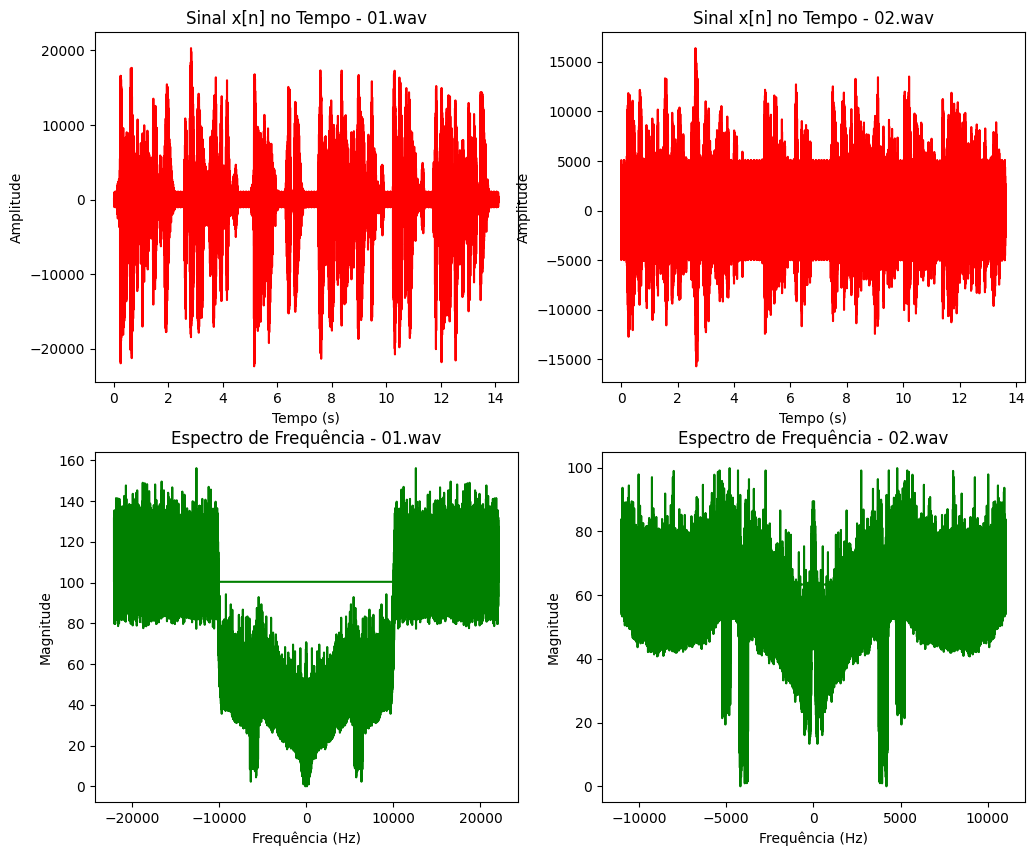

In [6]:
plt.figure(figsize=(12,10))

# Gráfico do sinal 01.wav no tempo
plt.subplot(2, 2, 1)
plt.plot(time1, wav01, color='r')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Sinal x[n] no Tempo - 01.wav")

# Gráfico do sinal 02.wav no tempo
plt.subplot(2, 2, 2)
plt.plot(time2, wav02, color='r')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Sinal x[n] no Tempo - 02.wav")

# Gráfico do espectro de frequência 01.wav
plt.subplot(2, 2, 3)
plt.plot(freq1, spectrum_db1, color='green')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.title("Espectro de Frequência - 01.wav")

# Gráfico do espectro de frequência 02.wav
plt.subplot(2, 2, 4)
plt.plot(freq2, spectrum_db2, color='green')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.title("Espectro de Frequência - 02.wav")

TERCEIRO PASSO: Implementar o filtro h[n] com os parâmetros ωc e L, tendo como base a fundamentação
teórica indicada.

In [7]:
fc1 = 6000
fc2 = 4000 
L1 = 101
L2 = 101 
fs1 = 44100
fs2 = 22050 

# Criando o filtro FIR passa-baixa
n1 = np.arange(L1)  
M1 = (L1 - 1) // 2
n2 = np.arange(L2)  
M2 = (L2 - 1) // 2

# Utilizando a Fórmula do filtro ideal (sinc) e normalizando pela frequência de amostragem
h1 = np.sinc(2 * fc1 * (n1 - M1) / fs1) 
h2 = np.sinc(2 * fc2 * (n2 - M2) / fs2)  

# Aplicando hamming
h1 *= np.hamming(L1)
h2 *= np.hamming(L2) 

# Normalizando o filtro
h1 /= np.sum(h1)
h2 /= np.sum(h2)

TERCEIRO PASSO: Plotar o gráfico de h[n] no tempo, a magnitude e a fase de sua resposta em frequência.

Plotando h[n] no tempo

Text(0, 0.5, 'Amplitude')

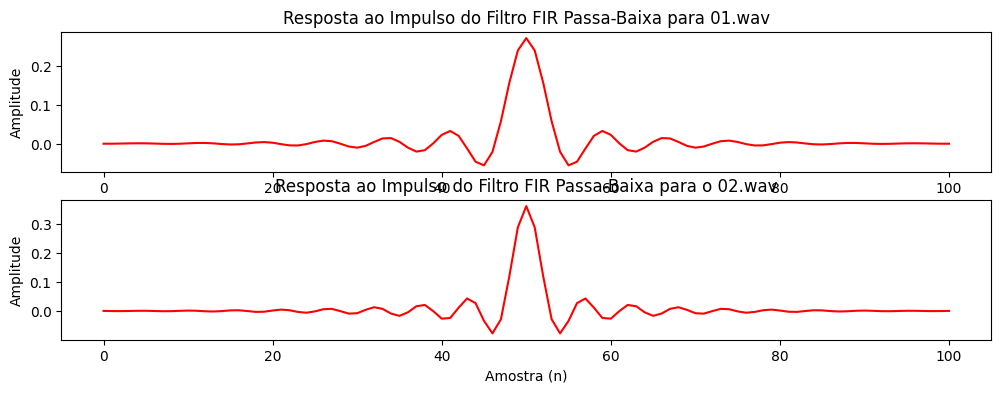

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(2,1,1)
plt.plot(n1, h1, color='r')
plt.title("Resposta ao Impulso do Filtro FIR Passa-Baixa para 01.wav")
plt.xlabel("Amostra (n)")
plt.ylabel("Amplitude")


plt.subplot(2,1,2)
plt.plot(n2, h2, color='r')
plt.title("Resposta ao Impulso do Filtro FIR Passa-Baixa para o 02.wav")
plt.xlabel("Amostra (n)")
plt.ylabel("Amplitude")


Plotando a magnitude 

Text(0, 0.5, 'Amplitude')

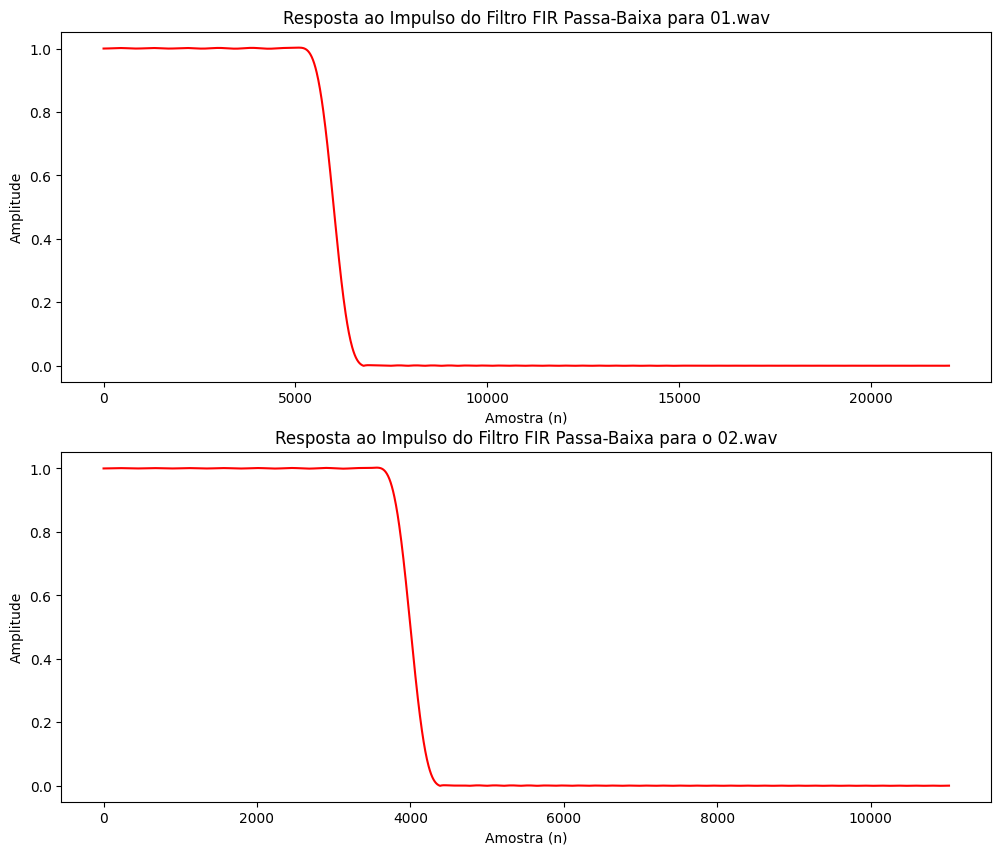

In [ ]:
# Para plotar a magnitude, primeiro precisamos descobrir a resposta em frequência do sinal h[n] aplicando a fft() na mesma

N_fft = 4096 # Esse parâmetro define o tamanho FFT


# Descobrindo a resposta em frequência
h1_fft = fft(h1, N_fft)  
h2_fft = fft(h2, N_fft) 

h1_freq = fftfreq(N_fft, 1/fs1)  
h2_freq = fftfreq(N_fft, 1/fs2) 

# Calculando a Magnitude
half_N = N_fft // 2

h1_freq = h1_freq[:half_N]
h2_freq = h2_freq[:half_N]

h1_mag = np.abs(h1_fft[:half_N])
h2_mag = np.abs(h2_fft[:half_N])


plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.plot(h1_freq, h1_mag, color='r')
plt.title("Resposta ao Impulso do Filtro FIR Passa-Baixa para 01.wav")
plt.xlabel("Amostra (n)")
plt.ylabel("Amplitude")


plt.subplot(2,1,2)
plt.plot(h2_freq, h2_mag,color='r')
plt.title("Resposta ao Impulso do Filtro FIR Passa-Baixa para o 02.wav")
plt.xlabel("Amostra (n)")
plt.ylabel("Amplitude")


Plotando a Fase

Text(0, 0.5, 'Amplitude')

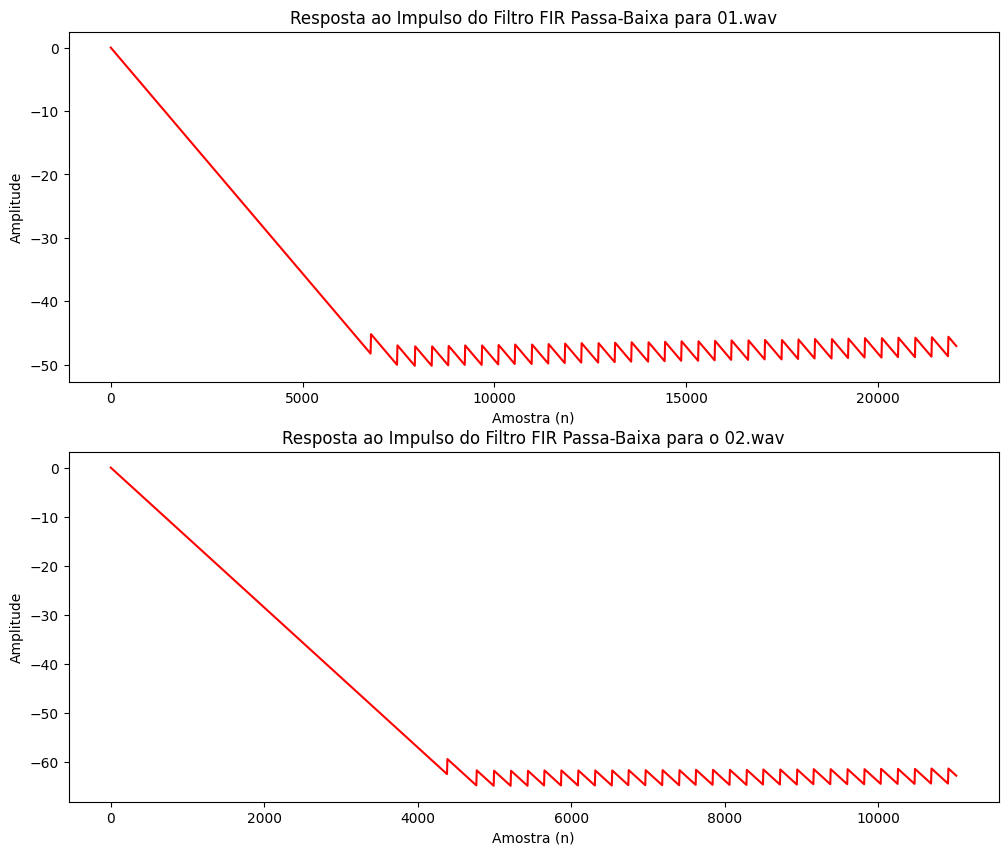

In [15]:
# Usando a função np.angle() podemos calcular a fase, já que descobrimos a resposta em frequência.

#h1_fase = np.angle(h1_fft[:half_N])
#h2_fase = np.angle(h2_fft[:half_N])
h1_fase = np.unwrap(np.angle(h1_fft[:half_N]))
h2_fase = np.unwrap(np.angle(h2_fft[:half_N]))


plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.plot(h1_freq[:N_fft//2], h1_fase[:N_fft//2], color='r')
plt.title("Resposta ao Impulso do Filtro FIR Passa-Baixa para 01.wav")
plt.xlabel("Amostra (n)")
plt.ylabel("Amplitude")


plt.subplot(2,1,2)
plt.plot(h2_freq, h2_fase,color='r')
plt.title("Resposta ao Impulso do Filtro FIR Passa-Baixa para o 02.wav")
plt.xlabel("Amostra (n)")
plt.ylabel("Amplitude")

QUINTO PASSO: Aplicar o filtro projetado e analisar o impacto da qualidade da filtragem ao variar os
parˆametros L e ωc.